In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_excel(r'C:\Users\HP\Desktop\dissertation_folder\code\Extracted_comments_and_likes.xlsx')
df2 = pd.read_csv(r'C:\Users\HP\Desktop\dissertation_folder\code\main.csv')
# df = pd.read_csv(r'C:\Users\HP\Desktop\sample_dissertation\code\Main.csv')
df1.head()

,Column1,Column2,Column3
0,Image,Comment,Likes
1,CmntBox1.png,"Simone Filipponi La scritta ""Salvataggio"" diet...",98
2,CmntBox2.png,tutullio C'è aria di fidanzamento,Piace a 310 persone
3,CmntBox3.png,Bre Jo Linesperto,Mi piace 339
4,CmntBox4.png,Mirco Grosso Succede anche a me|0,148


In [ ]:
b = df1.rename({'Column1': 'Image', 'Column2': 'Comment', 'Column3':'Likes'}, axis='columns')
M_df1= b[1:]
M_df1.to_csv("c.csv")
# M_df1.head()


In [ ]:
df3 = pd.read_csv(r'C:\Users\HP\Desktop\sample_dissertation\code\c.csv')

df3.head()
# df3['Comment']
# df2['Likes']


,Unnamed: 0,Image,Comment,Likes
0,1,CmntBox1.png,"Simone Filipponi La scritta ""Salvataggio"" diet...",98
1,2,CmntBox2.png,tutullio C'è aria di fidanzamento,Piace a 310 persone
2,3,CmntBox3.png,Bre Jo Linesperto,Mi piace 339
3,4,CmntBox4.png,Mirco Grosso Succede anche a me|0,148
4,5,CmntBox5.png,matteo_lungarini E si informa che dopo il 31a...,Piace a 571 persone


In [ ]:
df2['Likes']

0       0
1       0
2       0
3       0
4       1
       ..
5020    0
5021    1
5022    1
5023    0
5024    1
Name: Likes, Length: 5025, dtype: int64

In [ ]:
data = [df3["Comment"], df2["Likes"]]

headers = ["Comment", "Likes"]

df = pd.concat(data, axis=1, keys=headers)
df.head()


,Comment,Likes
0,"Simone Filipponi La scritta ""Salvataggio"" diet...",0
1,tutullio C'è aria di fidanzamento,0
2,Bre Jo Linesperto,0
3,Mirco Grosso Succede anche a me|0,0
4,matteo_lungarini E si informa che dopo il 31a...,1


In [ ]:
print(df[df['Comment'].isnull()])

Empty DataFrame
Columns: [Comment, Likes]
Index: []


ValueError: cannot convert float NaN to integer

In [ ]:
# import re
# Likes = df['Likes']
# l = []
# p = re.compile(r'\d+.\d+|\d+')
# for i in Likes:
#     a = re.findall(p,i)
#     s = ''.join(a)
#     l.append(s)

# x = []
# for i in l:
#     if i.isdigit():
#         Number = int(i)
#     else:
#         Number = float(i)
#         Number = Number*1000
#     x.append(Number)
# z = []
# a = 0
# for i in x:
#     if i<200:
#         a = 0
#     else:
#         a =1
#     z.append(a)


In [ ]:
# p = re.compile(r'\d+.\d+|\d+')
# l = []
# for i in Likes:
#     a = re.findall(p,i)
#     s = ''.join(a)
#     l.append(s)
# for x,i in enumerate(l):
#     if i=='4-346':
#         print(x)

        

4907


In [ ]:
for x, i in enumerate(df['Comment']):
    if i == ' Dopo il taglio tutti battono le mani al parrucchiere':
        print(type(i))

<class 'str'>
<class 'str'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df['Comment'], df['Likes'], test_size=0.40)



In [1]:
print(X_train)

NameError: name 'X_train' is not defined

In [8]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

OSError: SavedModel file does not exist at: C:\Users\HP\AppData\Local\Temp\tfhub_modules\602d30248ff7929470db09f7385fc895e9ceb4c0\{saved_model.pbtxt|saved_model.pb}

In [ ]:

# def get_sentence_embeding(sentences):
#     preprocessed_text = bert_preprocess(sentences)
#     return bert_encoder(preprocessed_text)['pooled_output']

# get_sentence_embeding([
#     'Gli avrà spaccato le giNokia']
    
# )

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)

outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_22 (KerasLayer)    {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                               

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


In [ ]:

model.fit(X_train, y_train, epochs=1)

95/95 [==============================] - 2867s 30s/step - loss: 0.7026 - accuracy: 0.5274 - precision: 0.4422 - recall: 0.2641


In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 2068s 33s/step - loss: 0.6822 - accuracy: 0.5547 - precision: 0.4626 - recall: 0.1126


[0.6821590065956116,
 0.5547263622283936,
 0.46261683106422424,
 0.11262798309326172]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)

y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
for i in y_predicted:
    print(i)

0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)

Text(33.0, 0.5, 'Truth')

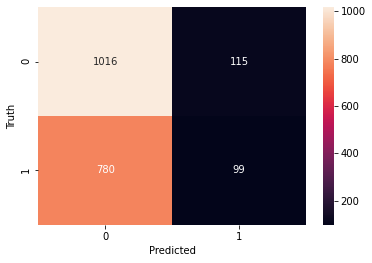

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# a = "Il kit extra  il KITEXTRAMUORT "

a = 'jim'

x = float(a)

print(x)

ValueError: could not convert string to float: 'jim'